雙子: 78 次
的: 77 次
座: 57 次
是: 41 次
我: 32 次
都: 32 次
也: 29 次
有: 24 次
星座: 23 次
了: 22 次
很: 22 次
來: 20 次
嗎: 17 次
你: 17 次
說: 16 次
在: 13 次
人: 12 次
臺: 12 次
灣: 12 次
噓: 12 次
不: 12 次
後: 11 次
跟: 11 次
就: 11 次
好: 11 次
發信: 10 次
站: 10 次
批: 10 次
踢踢: 10 次
實業坊: 10 次
pttcc: 10 次
文章: 10 次
網址: 10 次
就是: 10 次
sellgd: 10 次
時間: 9 次
自: 9 次
但: 9 次
一個: 9 次
真的: 9 次
要: 9 次
沒: 9 次
看: 9 次
找: 9 次
三分: 8 次
會: 8 次
吧: 8 次
流星雨: 8 次
知道: 7 次
啊: 7 次
去: 7 次
銀河星: 7 次
騎: 7 次
是不是: 6 次
最強: 6 次
教皇: 6 次
還是: 6 次
用: 6 次
驢: 6 次
馬: 6 次
位子: 6 次
爆: 6 次
宇宙: 6 次
可能: 5 次
較: 5 次
被: 5 次
一樣: 5 次
Dcwei: 5 次
自己: 5 次
植物: 5 次
又: 5 次
一下: 5 次
得: 5 次
應該: 5 次
O型: 5 次
韓導: 5 次
習近: 5 次
復: 5 次
VOLK: 5 次
做事: 4 次
台灣: 4 次
容易: 4 次
saa: 4 次
為: 4 次
嗚: 4 次
他: 4 次
小: 4 次
殺: 4 次
做: 4 次
朋友: 4 次
買: 4 次
很多: 4 次
鐘: 4 次
智障: 4 次
KangSuat: 4 次
coeXist: 4 次
wiston: 4 次
什麼: 4 次
等: 4 次
認識: 4 次
她: 4 次
不能: 4 次
borissun: 4 次
只有: 4 次
最: 4 次
雙魚: 4 次
啦: 4 次
挑戰: 4 次
處: 4 次
雙面: 4 次
兩個: 4 次
薩卡: 4 次
嘴: 4 次
近平: 3 次
更: 3 次
工作: 3 次
韓國瑜: 3 次
可以: 3 次
工具: 3 次
開始: 3 次
肥皂: 3 次
想要: 3 次
各位: 3 次
不然

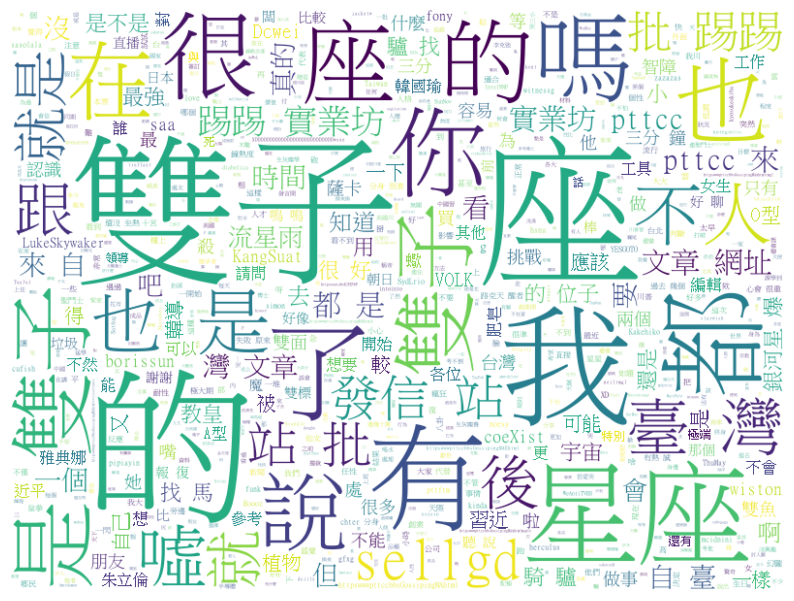

In [10]:
!pip install requests beautifulsoup4 jieba wordcloud matplotlib

import requests
from bs4 import BeautifulSoup
import re
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def strip_tags(html):
    # 利用正則表達式移除 HTML 標籤
    clean_text = re.sub('<[^<]+?>', '', html)
    return clean_text

def clean_text(text):
    # 使用正則表達式刪除標點符號、數字、空格和"推"
    cleaned_text = re.sub(r'[\W\d\s推]', '', text)
    return cleaned_text

def segment_text(text):
    # 使用jieba進行中文斷詞
    words = jieba.cut(text, cut_all=False)  # 使用精確模式

    # 刪除指定的字詞
    stop_words = {'看板', '問卦', '標題', '作者', 'k', '點點', 'kino', 'Gossiping'}
    words = [word for word in words if word not in stop_words]

    return words

def count_words(words):
    # 使用 Counter 進行字詞統計
    word_counts = Counter(words)

    # 按照出現次數由多到少排列
    sorted_word_counts = word_counts.most_common()

    return sorted_word_counts

def crawl_ptt_article(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Cookie': 'over18=1'  # 透過 Cookie 設定年齡限制
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 抓取文章內容
    content_tag = soup.find('div', id='main-content')
    if content_tag:
        content = strip_tags(content_tag.text)  # 使用 strip_tags 函數移除 HTML 標籤
        cleaned_content = clean_text(content)

        # 進行中文斷詞並刪除指定的字詞
        words = segment_text(cleaned_content)

        return words
    else:
        return []

def crawl_ptt_search_results(query):
    base_url = f'https://www.ptt.cc/bbs/Gossiping/search?q={query}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Cookie': 'over18=1'  # 透過 Cookie 設定年齡限制
    }

    response = requests.get(base_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 找出搜尋結果頁面中所有文章的連結
    articles = soup.find_all('div', class_='title')
    all_words = []
    for article in articles:
        if article.a:  # 檢查是否有 <a> 標籤
            article_url = 'https://www.ptt.cc' + article.a['href']
            words = crawl_ptt_article(article_url)
            all_words.extend(words)

    return all_words

def generate_wordcloud(words):
    # 將字詞轉成以空格分隔的字串
    text = ' '.join(words)

    # 指定中文字體（請替換成你電腦上的字體路徑）
    font_path = "C:/Windows/Fonts/mingliu.ttc"

    # 生成文字雲
    wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, width=800, height=600)
    wordcloud = wc.generate_from_text(text)

    # 顯示文字雲
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    query = '%E9%9B%99%E5%AD%90%E5%BA%A7'  # URL-encoded 的搜尋關鍵字
    words = crawl_ptt_search_results(query)

    if words:
        # 統計字詞出現次數
        sorted_word_counts = count_words(words)

        # 輸出結果
        for word, count in sorted_word_counts:
            print(f'{word}: {count} 次')

        # 生成文字雲
        generate_wordcloud(words)
    else:
        print('No words found.')
